In [ ]:
import pandas as pd
a=pd.read_csv('/content/heart (1).csv')
print(a)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

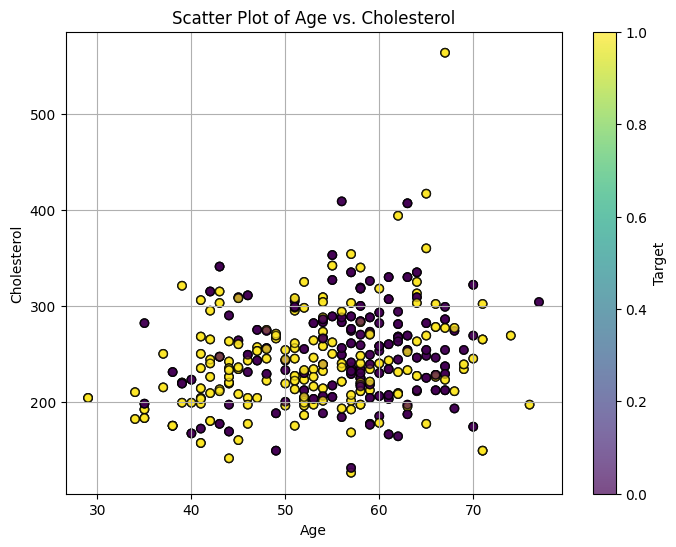

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd  # Assuming you've already imported pandas

# 'a' is your DataFrame, not 'df'
plt.figure(figsize=(8, 6))  # Adjust figure size if needed

# Use 'a' instead of 'df' to access columns
scatter = plt.scatter(a['age'], a['chol'], c=a['target'], cmap='viridis',
                      marker='o', edgecolor='black', alpha=0.7)

plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Scatter Plot of Age vs. Cholesterol')

# Add a colorbar to explain the color mapping
plt.colorbar(scatter, label='Target')

plt.grid(True)
plt.show()

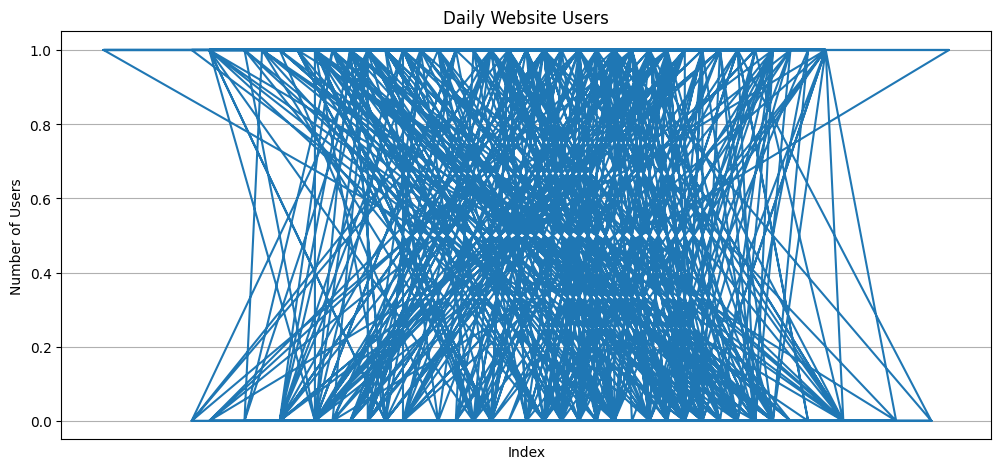

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'age' column DOES NOT exist, and we'll use the index as time series
# If you have a date column, replace 'index' with the actual column name

# Plot daily users (using index as time series)
a['sex'].plot(figsize=(12, 6), title='Daily Website Users')
plt.xlabel('Index') # Changed x-axis label
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()




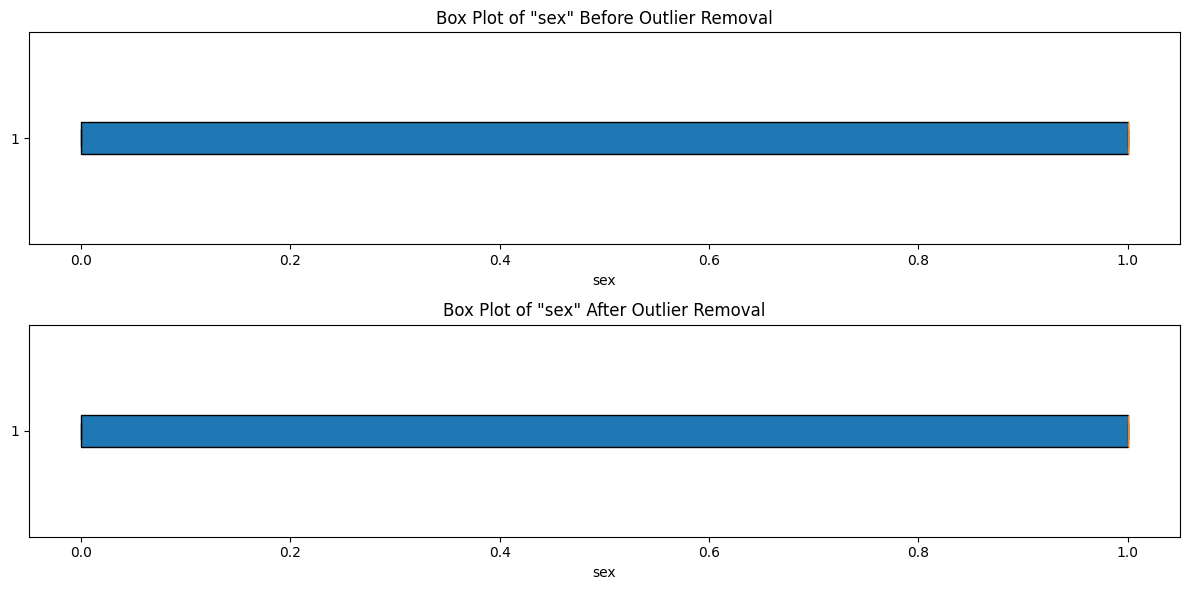

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def remove_outliers_iqr(data, column):
  """
  Removes outliers from a pandas DataFrame column using the IQR method.

  Args:
    data: pandas DataFrame
    column: Name of the column to remove outliers from

  Returns:
    pandas DataFrame with outliers removed
  """
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  data_filtered = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
  return data_filtered

# Load the dataframe
a = pd.read_csv('/content/heart (1).csv')

# Before removing outliers
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)  # Create a subplot for 'before'
plt.boxplot(a['sex'], vert=False, patch_artist=True)
plt.title('Box Plot of "sex" Before Outlier Removal')
plt.xlabel('sex')


# Remove outliers
a_filtered = remove_outliers_iqr(a, 'sex')

# After removing outliers
plt.subplot(2, 1, 2)  # Create a subplot for 'after'
plt.boxplot(a_filtered['sex'], vert=False, patch_artist=True)
plt.title('Box Plot of "sex" After Outlier Removal')
plt.xlabel('sex')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

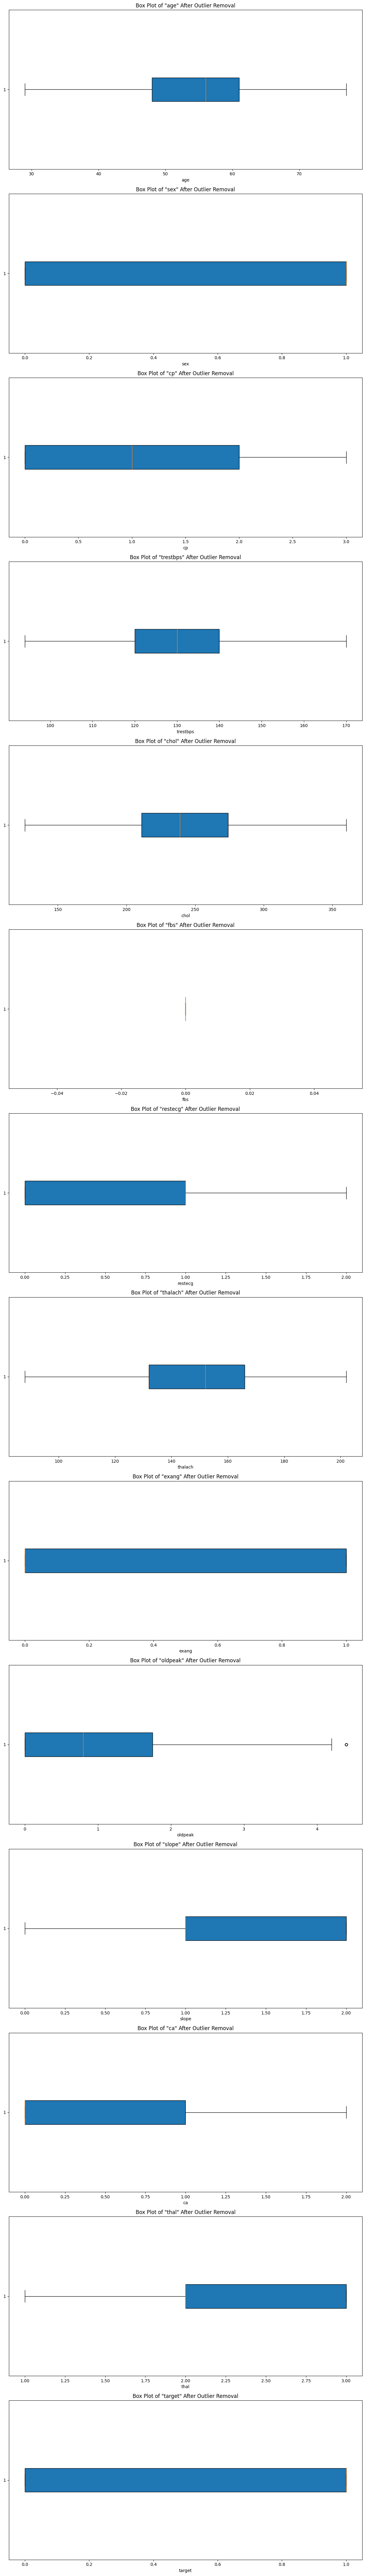

In [ ]:


# Load the dataframe
a = pd.read_csv('/content/heart (1).csv')

# Get numerical columns (excluding object/categorical types)
numerical_cols = a.select_dtypes(include=np.number).columns.tolist()

# Create subplots for each numerical column
fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(12, 6 * len(numerical_cols)))
# Adjust figsize as needed

for i, col in enumerate(numerical_cols):
    # Remove outliers for the current column
    a_filtered = remove_outliers_iqr(a, col)

    # Plot the boxplot after outlier removal
    axes[i].boxplot(a_filtered[col], vert=False, patch_artist=True)
    axes[i].set_title(f'Box Plot of "{col}" After Outlier Removal')
    axes[i].set_xlabel(col)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

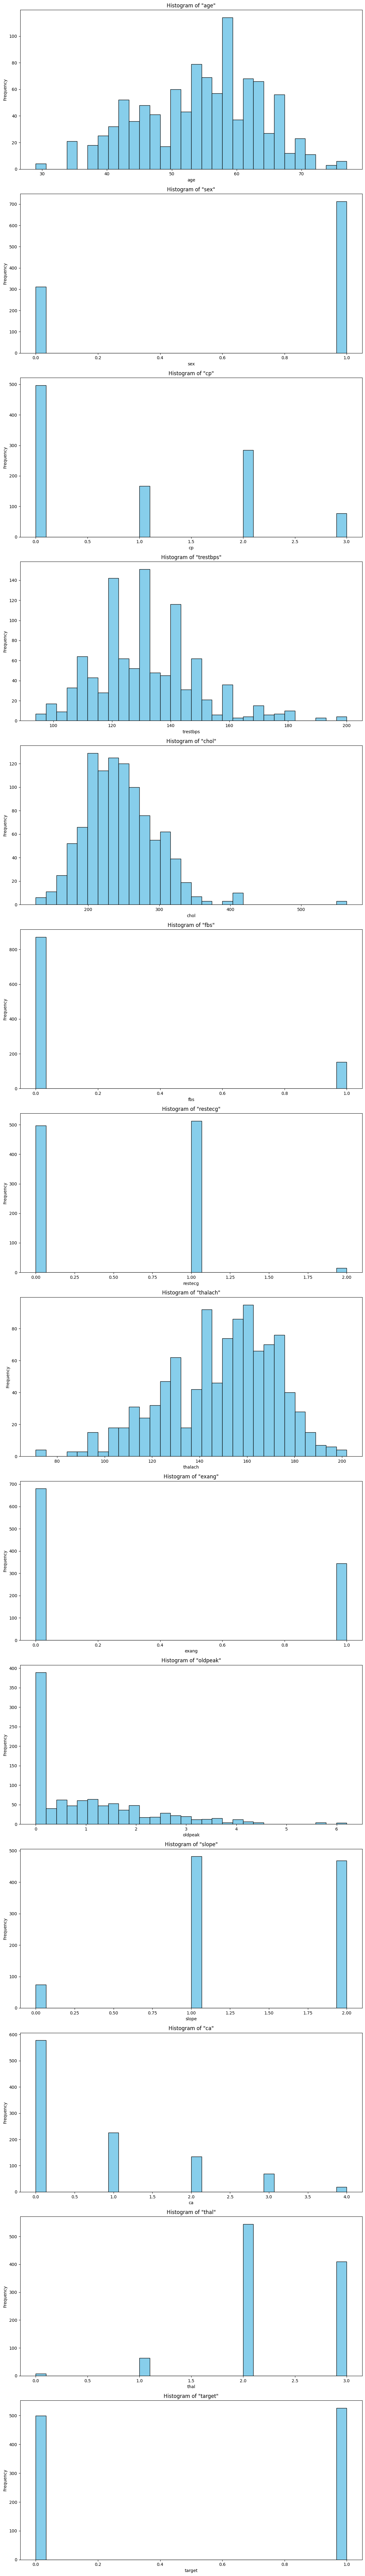

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataframe
a = pd.read_csv('/content/heart (1).csv')

# Get numerical columns (excluding object/categorical types)
numerical_cols = a.select_dtypes(include=np.number).columns.tolist()

# Create subplots for each numerical column
fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(12, 6 * len(numerical_cols)))
# Adjust figsize as needed

for i, col in enumerate(numerical_cols):
    # Plot the histogram
    axes[i].hist(a[col], bins=30, color='skyblue', edgecolor='black')  # Adjust bins as needed
    axes[i].set_title(f'Histogram of "{col}"')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

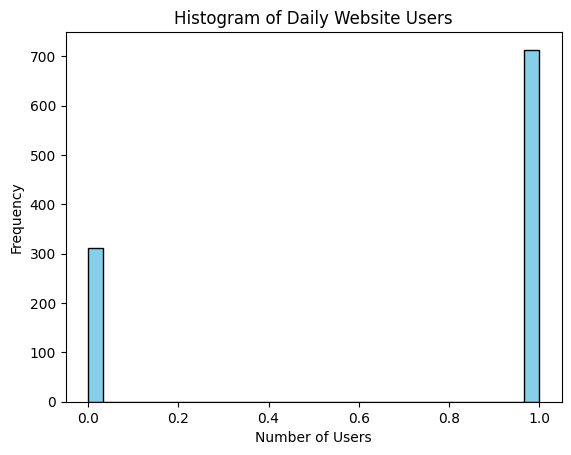

In [ ]:
import matplotlib.pyplot as plt
plt.hist(a['sex'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Daily Website Users')
plt.xlabel('Number of Users')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from scipy.stats import skew, kurtosis
numerical_cols = ['sex']
summary_stats = {}
for col in numerical_cols:
    summary_stats[col] = {
        'Mean': a[col].mean(),
        'Median': a[col].median(),
        'Standard Deviation': a[col].std(),
        'Skewness': skew(a[col], nan_policy='omit'),
        'Kurtosis': kurtosis(a[col], nan_policy='omit')
    }
summary_df = pd.DataFrame(summary_stats)
print(summary_df)

                         sex
Mean                0.695610
Median              1.000000
Standard Deviation  0.460373
Skewness           -0.850202
Kurtosis           -1.277156


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


X = a[['sex']]
y = a.index.dayofweek
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


file_path = "/content/heart (1).csv"
a = pd.read_csv(file_path)


print("\nAvailable Columns:", a.columns.tolist())

X = a[['sex', 'age', 'cp']]


y = a['sex']


if len(y.unique()) < 2:
    raise ValueError("Target variable must have at least two unique classes!")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nModel Accuracy: {accuracy:.2f}")



Available Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

✅ Model Accuracy: 1.00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


X = a[['value']]
y = a.index.dayofweek  a


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


tree_classifier = DecisionTreeClassifier(random_state=42)

tree_classifier.fit(X_train, y_train)
y_pred = tree_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.2863636363636364


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


file_path = "/content/heart (1).csv"
df = pd.read_csv(file_path)


print("\nAvailable Columns:", df.columns.tolist())


X = df[['sex', 'age', 'cp']]


y = df['sex']


if len(y.unique()) < 2:
    raise ValueError("Target variable must have at least two unique classes!")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


tree_classifier = DecisionTreeClassifier(random_state=42)


tree_classifier.fit(X_train, y_train)


y_pred = tree_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\n Model Accuracy: {accuracy:.2f}")



Available Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

✅ Model Accuracy: 1.00


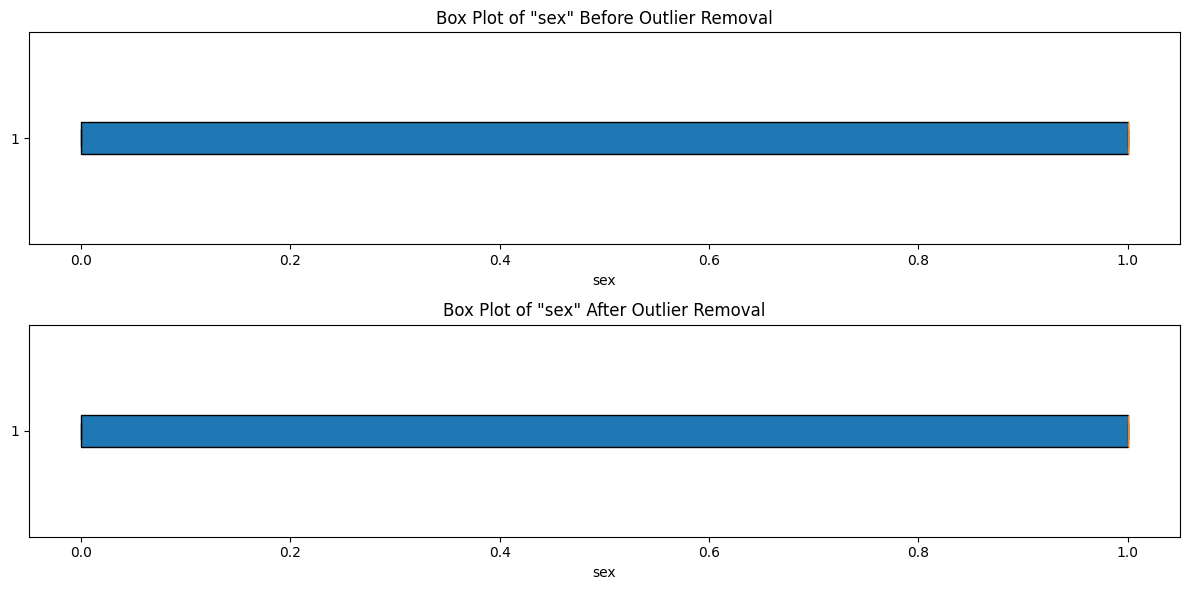

SVM Accuracy: 1.00
Decision Tree Accuracy: 1.00


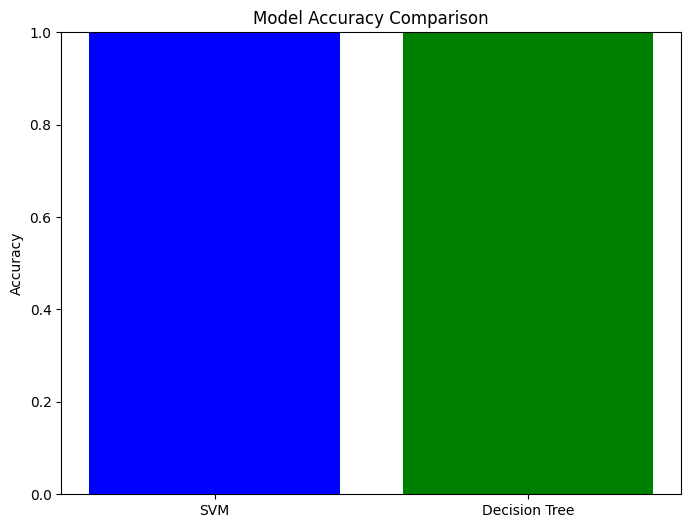

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataframe
file_path = "/content/heart (1).csv"  # Replace with your file path
df = pd.read_csv(file_path)

# Select features and target variable
X = df[['sex', 'age', 'cp']]  # Choose relevant features
y = df['sex']  # Choose the target variable

# Check if target variable has at least two unique classes
if len(y.unique()) < 2:
    raise ValueError("Target variable must have at least two unique classes!")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train SVM model
svm_classifier = SVC(kernel='linear')  # You can try different kernels
svm_classifier.fit(X_train, y_train)

# Create and train Decision Tree model
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train, y_train)

# Make predictions on the test set
svm_predictions = svm_classifier.predict(X_test)
tree_predictions = tree_classifier.predict(X_test)

# Calculate accuracy scores
svm_accuracy = accuracy_score(y_test, svm_predictions)
tree_accuracy = accuracy_score(y_test, tree_predictions)

# Print accuracy scores
print(f"SVM Accuracy: {svm_accuracy:.2f}")
print(f"Decision Tree Accuracy: {tree_accuracy:.2f}")

# Visualize accuracy scores
models = ['SVM', 'Decision Tree']
accuracies = [svm_accuracy, tree_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)  # Set y-axis limits to 0-1 for accuracy
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest

# Load dataset from CSV file (replace 'your_file.csv' with your actual file path)
file_path = "/content/Heartds.csv"
df = pd.read_csv(file_path)

# Ensure the dataset has required columns
if "SVM" not in df.columns or "DecisionTree" not in df.columns:
    raise ValueError("CSV file must contain 'SVM' and 'DecisionTree' columns.")

# Extract accuracy scores
svm_accuracies = df["SVM"].dropna().to_numpy()
tree_accuracies = df["DecisionTree"].dropna().to_numpy()

# Perform T-test
t_stat, p_value_t = stats.ttest_ind(svm_accuracies, tree_accuracies)

# Perform Z-test
z_stat, p_value_z = ztest(svm_accuracies, tree_accuracies)

# Print Results
print(f"T-test: t-statistic = {t_stat:.4f}, p-value = {p_value_t:.4f}")
print(f"Z-test: z-statistic = {z_stat:.4f}, p-value = {p_value_z:.4f}")

# Decision based on p-value (significance level α = 0.05)
alpha = 0.05

if p_value_t < alpha:
    print("Reject Null Hypothesis for T-test: Models have significantly different accuracies.")
else:
    print("Fail to Reject Null Hypothesis for T-test: No significant difference in accuracies.")

if p_value_z < alpha:
    print("Reject Null Hypothesis for Z-test: Models have significantly different accuracies.")
else:
    print("Fail to Reject Null Hypothesis for Z-test: No significant difference in accuracies.")


ValueError: CSV file must contain 'SVM' and 'DecisionTree' columns.

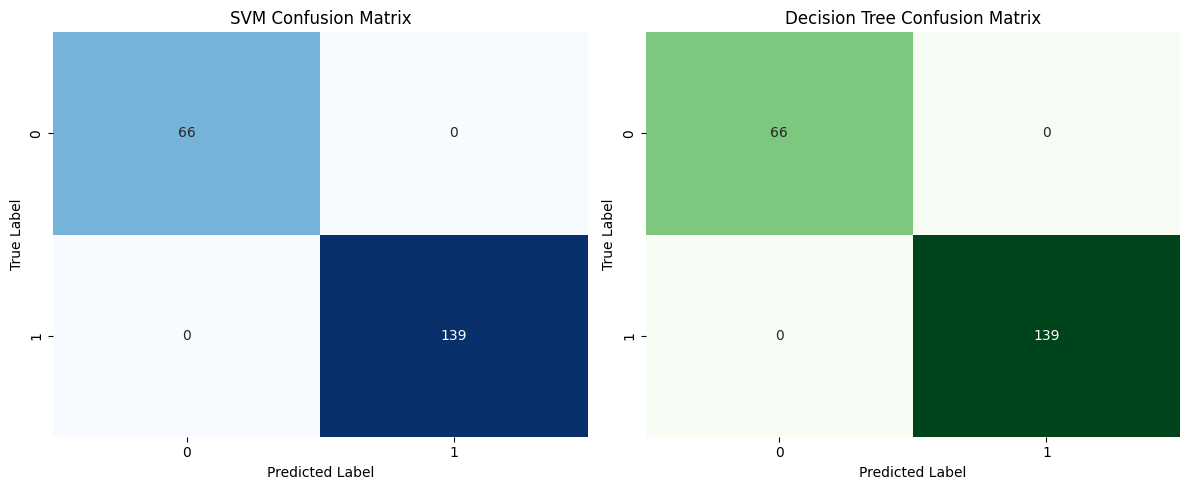

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for heatmap

# ... (rest of the code remains the same) ...

# Calculate confusion matrices
svm_cm = confusion_matrix(y_test, svm_predictions)
tree_cm = confusion_matrix(y_test, tree_predictions)

# Plot confusion matrices using seaborn heatmap
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(svm_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.subplot(1, 2, 2)
sns.heatmap(tree_cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from scipy.stats import norm
def z_test(acc1, acc2, n=200):
    """Performs Z-test between two model accuracies"""
    p1, p2 = acc1, acc2
    p = (p1 + p2) / 2
    se = np.sqrt(p * (1 - p) * (2 / n))
    z = (p1 - p2) / se
    p_value = 1 - norm.cdf(abs(z))
    return z, p_value

models = {'SVM': 0.79, 'Random Forest': 0.85, 'XGBoost': 0.85, 'LSTM': 0.84}
best_model = max(models, key=models.get)

print("\nModel Accuracies:")
for model, acc in models.items():
    print(f"{model}: {acc:.4f}")

print("\nZ-Test Results:")
for model1 in models:
    for model2 in models:
        if model1 != model2:
            z, p = z_test(models[model1], models[model2])
            print(f"{model1} vs {model2} → Z-score: {z:.4f}, P-value: {p:.4f}")

print(f"\nBest Model: {best_model} with accuracy {models[best_model]:.4f}")


Model Accuracies:
SVM: 0.7900
Random Forest: 0.8500
XGBoost: 0.8500
LSTM: 0.8400

Z-Test Results:
SVM vs Random Forest → Z-score: -1.5617, P-value: 0.0592
SVM vs XGBoost → Z-score: -1.5617, P-value: 0.0592
SVM vs LSTM → Z-score: -1.2877, P-value: 0.0989
Random Forest vs SVM → Z-score: 1.5617, P-value: 0.0592
Random Forest vs XGBoost → Z-score: 0.0000, P-value: 0.5000
Random Forest vs LSTM → Z-score: 0.2763, P-value: 0.3912
XGBoost vs SVM → Z-score: 1.5617, P-value: 0.0592
XGBoost vs Random Forest → Z-score: 0.0000, P-value: 0.5000
XGBoost vs LSTM → Z-score: 0.2763, P-value: 0.3912
LSTM vs SVM → Z-score: 1.2877, P-value: 0.0989
LSTM vs Random Forest → Z-score: -0.2763, P-value: 0.3912
LSTM vs XGBoost → Z-score: -0.2763, P-value: 0.3912

Best Model: Random Forest with accuracy 0.8500


In [ ]:
import numpy as np
from scipy.stats import ttest_ind

def t_test(acc1, acc2, n=200):
    """Performs independent t-test between two model accuracies"""
    p1, p2 = acc1, acc2
    var1 = p1 * (1 - p1) / n
    var2 = p2 * (1 - p2) / n
    se = np.sqrt(var1 + var2)
    t_stat = (p1 - p2) / se
    p_value = 1 - norm.cdf(abs(t_stat))  # One-tailed test
    return t_stat, p_value

models = {'SVM': 0.79, 'Random Forest': 0.85, 'XGBoost': 0.85, 'LSTM': 0.84}
best_model = max(models, key=models.get)

print("\nModel Accuracies:")
for model, acc in models.items():
    print(f"{model}: {acc:.4f}")

print("\nT-Test Results:")
for model1 in models:
    for model2 in models:
        if model1 != model2:
            t_stat, p = t_test(models[model1], models[model2])
            print(f"{model1} vs {model2} → T-score: {t_stat:.4f}, P-value: {p:.4f}")

print(f"\nBest Model: {best_model} with accuracy {models[best_model]:.4f}")



Model Accuracies:
SVM: 0.7900
Random Forest: 0.8500
XGBoost: 0.8500
LSTM: 0.8400

T-Test Results:
SVM vs Random Forest → T-score: -1.5665, P-value: 0.0586
SVM vs XGBoost → T-score: -1.5665, P-value: 0.0586
SVM vs LSTM → T-score: -1.2903, P-value: 0.0985
Random Forest vs SVM → T-score: 1.5665, P-value: 0.0586
Random Forest vs XGBoost → T-score: 0.0000, P-value: 0.5000
Random Forest vs LSTM → T-score: 0.2763, P-value: 0.3911
XGBoost vs SVM → T-score: 1.5665, P-value: 0.0586
XGBoost vs Random Forest → T-score: 0.0000, P-value: 0.5000
XGBoost vs LSTM → T-score: 0.2763, P-value: 0.3911
LSTM vs SVM → T-score: 1.2903, P-value: 0.0985
LSTM vs Random Forest → T-score: -0.2763, P-value: 0.3911
LSTM vs XGBoost → T-score: -0.2763, P-value: 0.3911

Best Model: Random Forest with accuracy 0.8500
